In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configuration

In [12]:
data_file    = 'cardiacData.csv'
data_columns = [ 'HR', 'Att', 'STE', 'Age', 'Outcome' ]
data_header  = -1

# Import Data

In [2]:
file_data = pd.read_csv(data_file, header = data_header, names = data_columns)
# file_data.iloc[:, [0, 1, 2, 3, 4]].values
df = pd.DataFrame(file_data)

# Understanding The Data

## File Metadata

In [3]:
df.dtypes

HR         int64
Att        int64
STE        int64
Age        int64
Outcome    int64
dtype: object

## Data Sample

In [4]:
pd.set_option('display.max_rows', 5)
df

,HR,Att,STE,Age,Outcome
0,84,0,55,0,0
1,76,0,80,0,0
...,...,...,...,...,...
248,71,0,68,0,0
249,73,0,49,1,0


## Data Description

In [13]:
pd.set_option('display.max_rows', -1)
df.describe()

,HR,Att,STE,Age,Outcome
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,70.008000,0.104000,65.548000,0.360000,0.332000
std,14.472795,0.305873,14.091486,0.513278,0.471876
min,26.000000,0.000000,23.000000,0.000000,0.000000
25%,61.000000,0.000000,55.250000,0.000000,0.000000
50%,70.000000,0.000000,67.000000,0.000000,0.000000
75%,78.000000,0.000000,76.000000,1.000000,1.000000
mean,70.008000,0.104000,65.548000,0.360000,0.332000
std,14.472795,0.305873,14.091486,0.513278,0.471876
min,26.000000,0.000000,23.000000,0.000000,0.000000


# Data Visualization

## Histograms

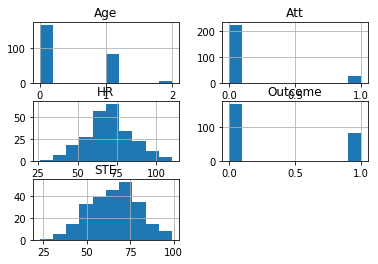

In [6]:
# Univariate Histograms
df.hist()
plt.show()

We can see that perhaps the attributes HR and STE may have a _Gaussian distribution_. This is interesting because many machine learning techniques assume a Gaussian univariate (single variable) distribution on the input variables.

## Density Plots

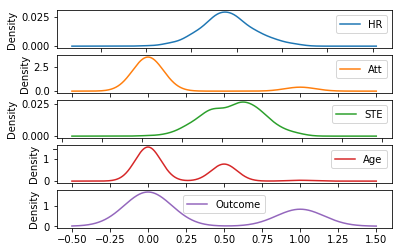

In [15]:
# Univariate Density Plots
df.plot(kind = 'density', subplots = True, layout = (5,1), sharex = False)
plt.show()

## Box-And-Whisker Plot

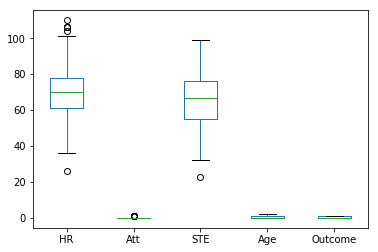

In [8]:
df.plot(kind = 'box')
plt.show()

## Scatter Matrix

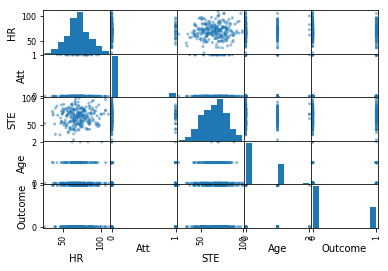

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(file_data)
plt.show()

# Data Pre-Processing

# Find K

## Elbow Method (Sum of Squared Errors)

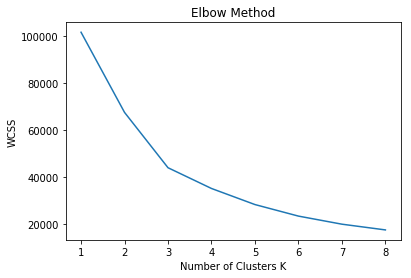

In [10]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []
samples = 9

for k in range(1, samples):
    kmeans = KMeans(k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(file_data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, samples), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters K')
# Average Within Cluster Distances to Centroid
# or Within Cluster Sum of Squares
plt.ylabel('WCSS')
plt.show()